In [1]:
%cd ~/Dropbox/research/football/code/sfm
import sfmnet
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import imageio

/Users/ajaffe/Dropbox/research/football/code/sfm


In [2]:
data_dir = '../../datasets/empty_goal_close_gray480p'
model_path = '/Users/ajaffe/Dropbox/research/football/models/2020-09-22_football_1027201.pt'
chkpt = torch.load(model_path, map_location=torch.device('cpu'))
m = sfmnet.SfMNet(H=480, W=720, conv_depth=4, im_channels=1, C=16, K=5, hidden_layer_widths=[1024,1024])

m.load_state_dict(chkpt['model_state_dict'])

In [3]:
import pair_frames_dataset
validation_split = 0.1

ds = pair_frames_dataset.PairConsecutiveFramesDataset(data_dir)
n_validation = int(len(ds) * validation_split)
n_train = len(ds) - n_validation
print(f'Validation size {n_validation}, train size {n_train}')
ds_train, ds_validation = torch.utils.data.random_split(ds, [n_train, n_validation], generator=torch.Generator().manual_seed(42))


Validation size 999, train size 8993


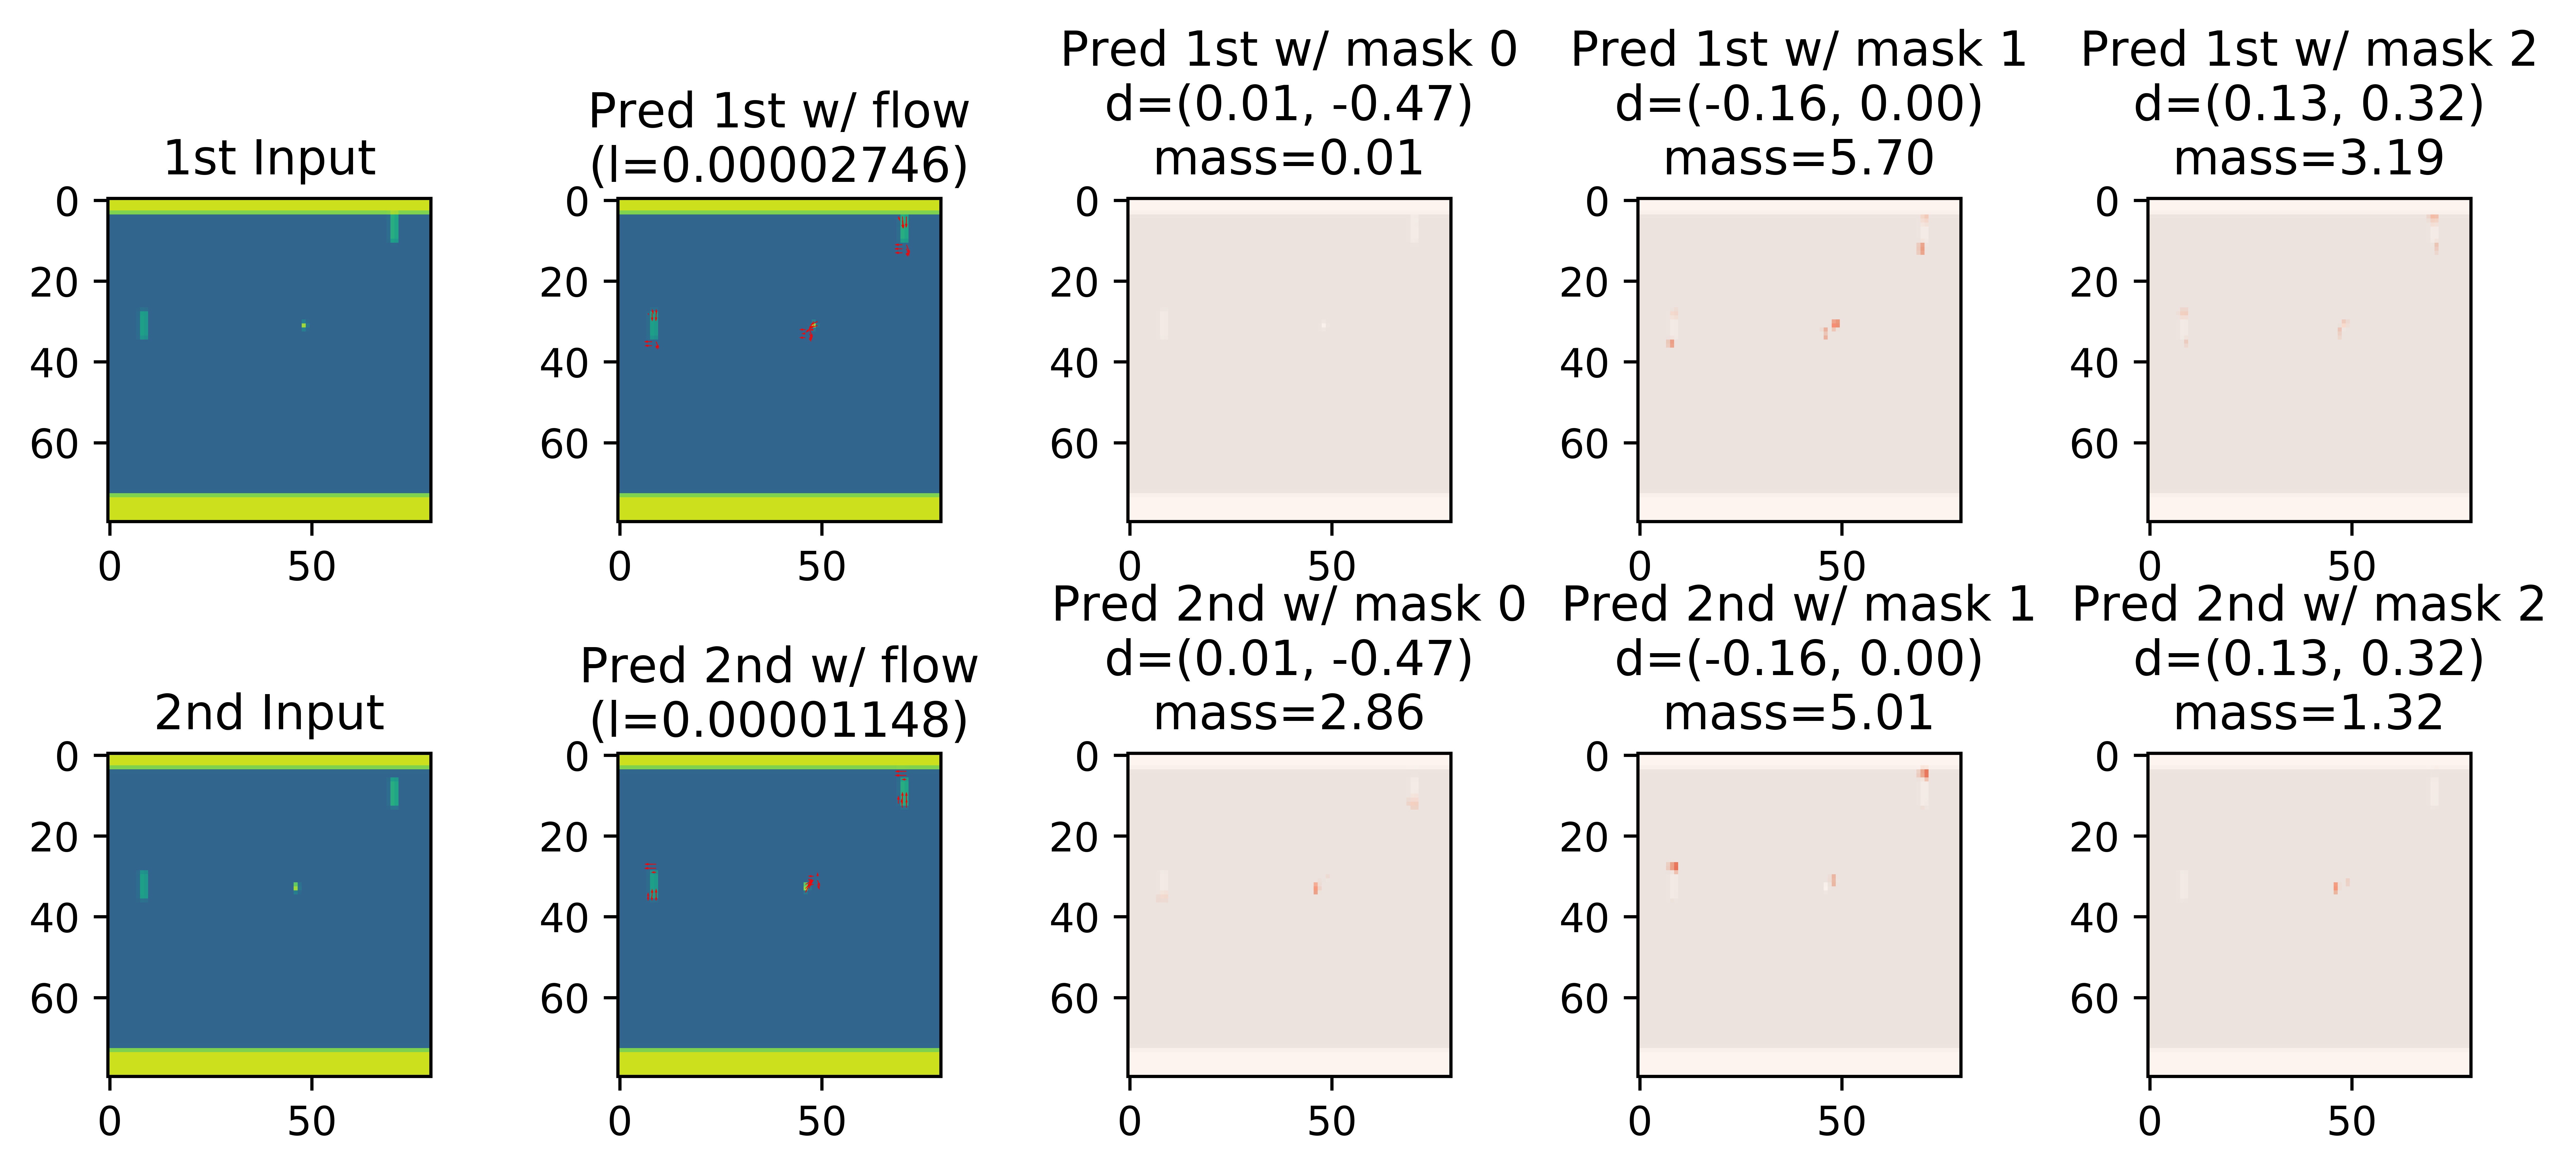

In [4]:
fig = sfmnet.visualize(m, *ds_validation[0:1])
#fig.savefig('pong.png')

In [7]:
fig.savefig('pong.png')

(array([6.394e+03, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.03806939, 0.07613877, 0.11420815, 0.15227754,
        0.19034693, 0.22841631, 0.2664857 , 0.3045551 , 0.34262446,
        0.38069385], dtype=float32),
 <a list of 10 Patch objects>)

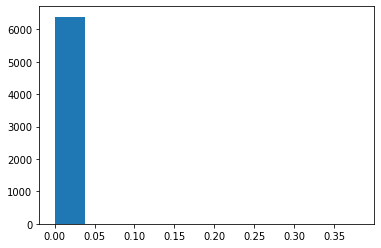

In [11]:
m.eval()
with torch.no_grad():
    out, masks, flow, displacement = m(torch.cat(ds_validation[0:1], dim=1))
    flat_mask = torch.flatten(masks, start_dim=2).squeeze()
flat_mask.shape
plt.hist(flat_mask[2])